In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [56]:
df = pd.read_csv('sample/server-room-19-1-22-clean.csv')

In [57]:
df.time.head()

0    2021-09-11T00:00:10.236Z
1    2021-09-11T00:01:00.260Z
2    2021-09-11T00:01:50.228Z
3    2021-09-11T00:02:40.242Z
4    2021-09-11T00:03:30.212Z
Name: time, dtype: object

### Clean date data

In [58]:
df['time'] = pd.to_datetime(df['time'])

In [59]:
df.time.head()

0   2021-09-11 00:00:10.236000+00:00
1   2021-09-11 00:01:00.260000+00:00
2   2021-09-11 00:01:50.228000+00:00
3   2021-09-11 00:02:40.242000+00:00
4   2021-09-11 00:03:30.212000+00:00
Name: time, dtype: datetime64[ns, UTC]

In [60]:
df

,temperature,time
0,22.8,2021-09-11 00:00:10.236000+00:00
1,22.8,2021-09-11 00:01:00.260000+00:00
2,22.8,2021-09-11 00:01:50.228000+00:00
3,22.8,2021-09-11 00:02:40.242000+00:00
4,22.9,2021-09-11 00:03:30.212000+00:00
...,...,...
147823,21.7,2022-01-11 23:55:13.800000+00:00
147824,21.6,2022-01-11 23:56:13.725000+00:00
147825,21.6,2022-01-11 23:57:13.808000+00:00
147826,21.6,2022-01-11 23:58:13.800000+00:00


### Sort columns by hour

In [61]:
# df = df[0::60]
# df

<AxesSubplot:>

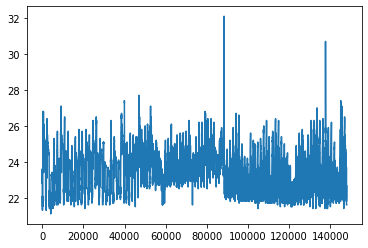

In [62]:
temp = df['temperature']
temp.plot()

### View data dimension

In [63]:
shape = df.shape
print('DataFrame Shape :', shape)
print('Number of rows :', shape[0])
print('Number of columns :', shape[1])

DataFrame Shape : (147828, 2)
Number of rows : 147828
Number of columns : 2


### Breakdown data and label (Supervise learning)

In [64]:
window_size = 5

In [65]:
def df_to_X_y(df, window_size):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [66]:
WINDOW_SIZE = 5
X1, y1 = df_to_X_y(temp, WINDOW_SIZE)
X1.shape, y1.shape

((147823, 5, 1), (147823,))

In [67]:
# X_train1, y_train1 = X1[:60000], y1[:60000]
# X_val1, y_val1 = X1[60000:65000], y1[60000:65000]
# X_test1, y_test1 = X1[65000:], y1[65000:]
# X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

### Split training, validation and testing data

In [82]:
X_train1, y_train1 = X1[:90000], y1[:90000]
X_val1, y_val1 = X1[90000:95000], y1[90000:95000]
X_test1, y_test1 = X1[95000:], y1[95000:]
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

((90000, 5, 1), (90000,), (5000, 5, 1), (5000,), (52823, 5, 1), (52823,))

### Configure model

In [83]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(InputLayer((5, 1)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 64)                16896     
                                                                 
 dense_6 (Dense)             (None, 8)                 520       
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17,425
Trainable params: 17,425
Non-trainable params: 0
_________________________________________________________________


### Compile model

In [84]:
cp1 = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [85]:
# import absl.logging
# absl.logging.set_verbosity(absl.logging.ERROR)

### Fit model

In [86]:
model1.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=10, callbacks=[cp1])

Epoch 1/10
2813/2813 [==============================] - 12s 4ms/step - loss: nan - root_mean_squared_error: nan - val_loss: nan - val_root_mean_squared_error: nan
Epoch 2/10
2813/2813 [==============================] - 10s 4ms/step - loss: nan - root_mean_squared_error: nan - val_loss: nan - val_root_mean_squared_error: nan
Epoch 3/10
2813/2813 [==============================] - 10s 4ms/step - loss: nan - root_mean_squared_error: nan - val_loss: nan - val_root_mean_squared_error: nan
Epoch 4/10
2813/2813 [==============================] - 12s 4ms/step - loss: nan - root_mean_squared_error: nan - val_loss: nan - val_root_mean_squared_error: nan
Epoch 5/10
2813/2813 [==============================] - 12s 4ms/step - loss: nan - root_mean_squared_error: nan - val_loss: nan - val_root_mean_squared_error: nan
Epoch 6/10
2813/2813 [==============================] - 11s 4ms/step - loss: nan - root_mean_squared_error: nan - val_loss: nan - val_root_mean_squared_error: nan
Epoch 7/10
2813/2813 [

In [87]:
from tensorflow.keras.models import load_model
model1 = load_model('model1/')

In [88]:
#from tensorflow.keras.layers import Flatten
train_predictions = model1.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1})
train_results

,Train Predictions,Actuals
0,23.525719,22.9
1,23.526655,22.9
2,23.528021,22.9
3,23.528791,22.9
4,23.529041,23.0
...,...,...
89995,23.563341,23.7
89996,23.563341,23.7
89997,23.563341,23.7
89998,23.563341,23.7


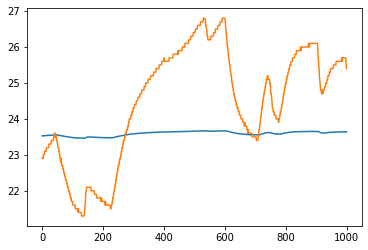

In [89]:
plt.plot(train_results['Train Predictions'][:1000])
plt.plot(train_results['Actuals'][:1000])

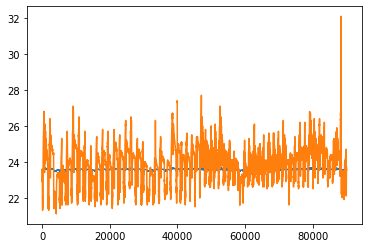

In [90]:
plt.plot(train_results['Train Predictions'])
plt.plot(train_results['Actuals'])

In [91]:
val_predictions = model1.predict(X_val1).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':y_val1})
val_results

,Val Predictions,Actuals
0,23.563341,23.7
1,23.563341,23.7
2,23.563341,23.7
3,23.563341,23.7
4,23.563341,23.7
...,...,...
4995,23.531935,22.6
4996,23.525705,22.6
4997,23.520823,22.5
4998,23.516697,22.5


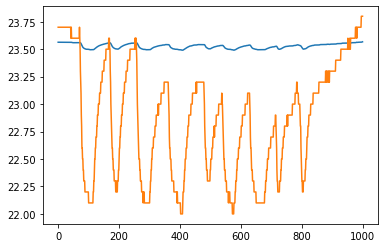

In [94]:
plt.plot(val_results['Val Predictions'][:1000])
plt.plot(val_results['Actuals'][:1000])

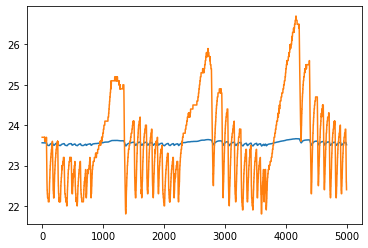

In [93]:
plt.plot(val_results['Val Predictions'])
plt.plot(val_results['Actuals'])